In [1]:
import random
import numpy as np
from algorithms import *
import pylab as pl
%matplotlib inline
import networkx as nx
from ipywidgets import FloatProgress
from IPython.display import display
dview = None
import matplotlib.pyplot as plt

In [3]:
import pickle
f = open('valores.dat' ,'rb')
datadict = pickle.load(f)

valores_circulo = datadict['circle_fixation_probabilities_100']
valores_lattice = datadict['lattice_fixation_probabilities_100']
valores_random = datadict['random_fixation_probabilities_100']
f.close()

## Death-Birth

In [6]:
#parameters and functions

w = 0.01
c = 0.125
n_graphs = 1000
n_runs = 1000
#For quick and less accurate results choose smaller numbers, e.g.
#n_graphs = 100
#n_runs = 500

xdata = np.linspace(1,21,10)
arrow_length = 0.001
markeredgecolordict = {2:'red',3:'orange',4:'yellow',6:'green',8:'cyan',10:'blue'}
markerfacecolordict = {2:'red',3:'none',4:'none',6:'none',8:'cyan',10:'blue'}
markerdict = {2:'+',3:'^',4:'s',6:'H',8:'s',10:'D'}

n_datapoints = 10
benefit_to_cost_ratios = dict()
benefit_to_cost_ratios[2] = np.linspace(1.2,4,n_datapoints)
benefit_to_cost_ratios[3] = np.linspace(1.5,5,n_datapoints)
benefit_to_cost_ratios[4] = np.linspace(2,6,n_datapoints) 
benefit_to_cost_ratios[6] = np.linspace(4,9,n_datapoints)
benefit_to_cost_ratios[8] = np.linspace(4,14,n_datapoints)
benefit_to_cost_ratios[10] = np.linspace(8,20,n_datapoints)

def measure_fixation_probabilities_for_list_of_k_and_bc_values(graph_generator, N, k_values, n_graphs, n_runs):
    fp = FloatProgress(min=0,max=len(k_values))
    display(fp)
    fixation_probabilities = []
    for k in k_values:
        bc = benefit_to_cost_ratios[k]
        fixation_probabilities.append(measure_fixation_probabilities(graph_generator,[N,k],w,c,n_graphs,n_runs,bc,dview=dview))
        fp.value += 1
    return fixation_probabilities

### Circle graph

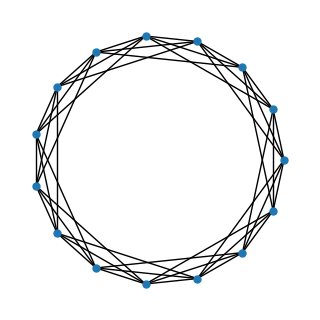

In [7]:
#illustration of the graph type

pl.figure(figsize=(3,3))
N = 15
G = nx.newman_watts_strogatz_graph(N,6,0)
positions = dict([(n,(np.cos(2*np.pi*n/float(N)),np.sin(2*np.pi*n/float(N)))) for n in G.nodes()])
nx.draw(G,pos = positions, node_size = 25)

In [9]:
#parameters and functions

circle_k_values = [2,4,6,10]

def circle_graph_generator(N,k):
    G = nx.newman_watts_strogatz_graph(N,k,0)
    return convert_networkx_graph_to_adjacency_list(G)

In [ ]:
#simulation
N = 100
circle_fixation_probabilities_100 = measure_fixation_probabilities_for_list_of_k_and_bc_values(circle_graph_generator, N, circle_k_values, n_graphs, n_runs)

### Lattice

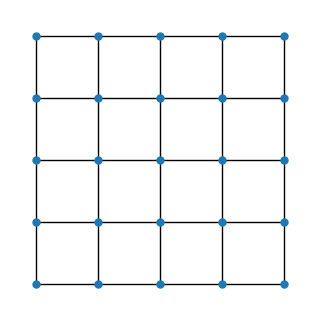

In [38]:
#illustration of the graph type

pl.figure(figsize=(3,3))
G = nx.grid_graph(dim=[5,5])
positions = dict([(n,n) for n in G.nodes()])
nx.draw(G,pos=positions, node_size = 25)

In [8]:
#parameters and functions

def lattice_graph3(N1,N2):
    G = create_hexagonal_lattice_graph(N1,N2)
    return convert_networkx_graph_to_adjacency_list(G)
def lattice_graph4(N1,N2):
    G = create_square_lattice_graph4(N1,N2)
    return convert_networkx_graph_to_adjacency_list(G)
def lattice_graph6(N1,N2):
    G = create_square_lattice_graph6(N1,N2)
    return convert_networkx_graph_to_adjacency_list(G)
def lattice_graph8(N1,N2):
    G = create_triangular_lattice_graph(N1,N2)
    return convert_networkx_graph_to_adjacency_list(G)

lattice_k_values = [3,4,6,8]

In [ ]:
#simulcion

N = 100

fp = FloatProgress(min=0,max=4)
display(fp)

lattice_fixation_probabilities3_100 = measure_fixation_probabilities(lattice_graph3,[10,15],w,c,n_graphs,n_runs,benefit_to_cost_ratios[3],dview=dview)
fp.value += 1

lattice_fixation_probabilities4_100 = measure_fixation_probabilities(lattice_graph4,[10,10],w,c,n_graphs,n_runs,benefit_to_cost_ratios[4],dview=dview)
fp.value += 1

lattice_fixation_probabilities6_100 = measure_fixation_probabilities(lattice_graph6,[10,10],w,c,n_graphs,n_runs,benefit_to_cost_ratios[6],dview=dview)
fp.value += 1

lattice_fixation_probabilities8_100 = measure_fixation_probabilities(lattice_graph8,[10,10],w,c,n_graphs,n_runs,benefit_to_cost_ratios[8],dview=dview)
fp.value += 1

lattice_fixation_probabilities_100 = [lattice_fixation_probabilities3_100, lattice_fixation_probabilities4_100, lattice_fixation_probabilities6_100, lattice_fixation_probabilities8_100]

### Random Graph 

In [10]:
def random_graph_generator(N,k):
    G = create_connected_random_graph(N,k)
    return convert_networkx_graph_to_adjacency_list(G)

random_k_values = [3,4,6,10]

In [ ]:
#simulación
N = 100
random_fixation_probabilities_100 = measure_fixation_probabilities_for_list_of_k_and_bc_values(random_graph_generator, N, random_k_values, n_graphs, n_runs)

### Plotear figuras

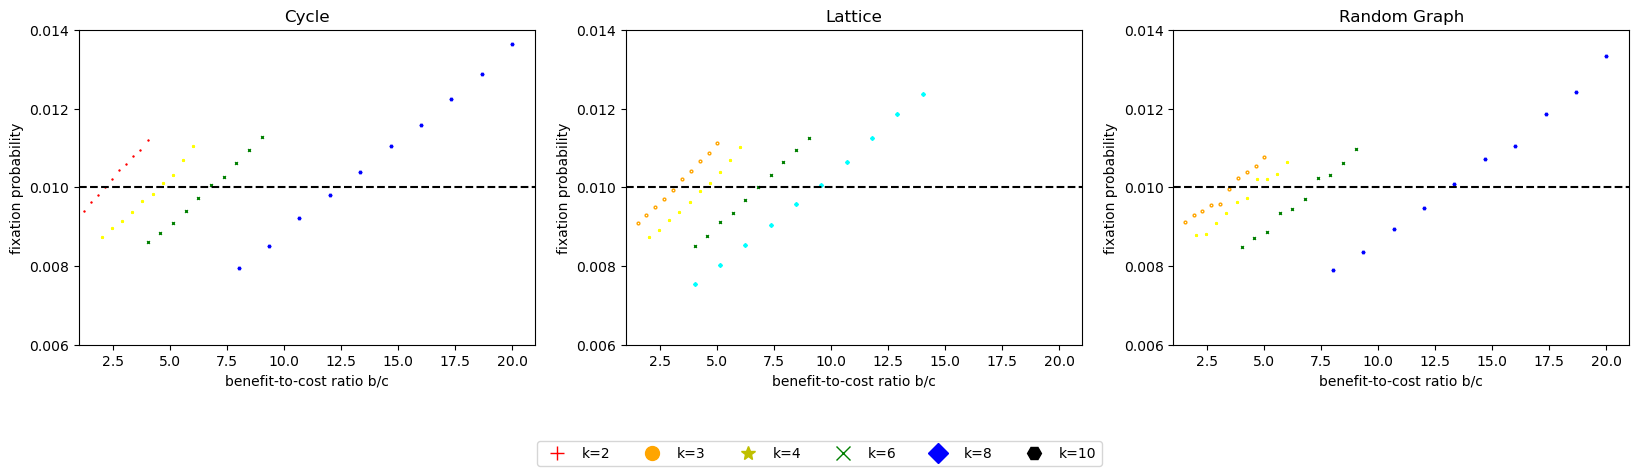

In [11]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5), sharex=True)


col = {1:"r", 2:"Orange",4:"y",6:"g", 8:"Blue",10:"k"}
mak = {1:"+", 2:"o",4:"*",6:"x", 8:"D",10:"H"}
for k,fp in zip(circle_k_values, valores_circulo):
    axs[0].plot(benefit_to_cost_ratios[k], fp, marker=mak[k], markersize = 2, markeredgewidth=1, markeredgecolor=markeredgecolordict[k], markerfacecolor=markerfacecolordict[k] ,linestyle='None', color = col[k])

for k,fp in zip(lattice_k_values, valores_lattice):
    axs[1].plot(benefit_to_cost_ratios[k], fp, marker=mak[k], markersize = 2, markeredgewidth=1, markeredgecolor=markeredgecolordict[k], markerfacecolor=markerfacecolordict[k] ,linestyle='None',  color = col[k])
    
for k,fp in zip(random_k_values, valores_random):
    axs[2].plot(benefit_to_cost_ratios[k], fp, marker=mak[k], markersize = 2, markeredgewidth=1, markeredgecolor=markeredgecolordict[k], markerfacecolor=markerfacecolordict[k] ,linestyle='None',  color = col[k])

axs[0].plot(xdata, np.ones(len(xdata))/100.0,'k--',label='neutral')
axs[0].set_xlim(1,17)
axs[0].set_ylim(0.006,0.014)
axs[0].set_yticks([0.006,0.008,0.010,0.012,0.014])
axs[0].set_ylabel("fixation probability")
axs[0].set_xlabel("benefit-to-cost ratio b/c")
axs[0].set_title("Cycle")
axs[1].plot(xdata, np.ones(len(xdata))/100.0,'k--',label='neutral')
axs[1].set_xlim(1,21)
axs[1].set_ylim(0.006,0.014)
axs[1].set_yticks([0.006,0.008,0.010,0.012,0.014])
axs[1].set_ylabel("fixation probability")
axs[1].set_xlabel("benefit-to-cost ratio b/c")
axs[1].set_title("Lattice")
axs[2].set_title("Random Graph")
axs[2].plot(xdata, np.ones(len(xdata))/100.0,'k--',label='neutral')
axs[2].set_xlim(1,21)
axs[2].set_ylim(0.006,0.014)
axs[2].set_yticks([0.006,0.008,0.010,0.012,0.014])
axs[2].set_ylabel("fixation probability")
axs[2].set_xlabel("benefit-to-cost ratio b/c")


handles = [plt.Line2D([0], [0], color=col[k], marker=mak[k], markersize=10, linestyle='None', label=f'k={k}') for k in col.keys()]
fig.legend(handles=handles, loc='lower center', ncol=len(col))
fig.subplots_adjust(bottom=0.25)